# 数理统计第二次大作业

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import f as F_TEST
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

In [3]:
x = pd.DataFrame(boston.data, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                                       'DIS','RAD','TAX','PTRATIO','B','LSTAT'])
y = pd.DataFrame(boston.target.reshape(-1,1), columns=['MEDV'])
data = pd.concat([x,y], axis=1)
col = data.columns
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 储存数据
# data.to_csv('data.csv')

### CHAS和RAD是类别型数值特征

In [5]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [6]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

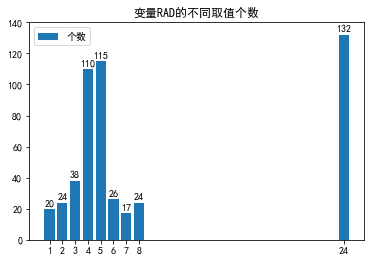

In [7]:
rad = pd.DataFrame(data['RAD'].value_counts()).reset_index().rename(columns={'index':'取值','RAD':'个数'})
x_rad = rad['取值']
y_rad = rad['个数']
plt.bar(x_rad, y_rad, label='个数')
plt.xticks(x_rad)
plt.ylim(0,140)
for a,b in zip(x_rad,y_rad):
    plt.text(a, b+1, b, ha="center", va="bottom", fontsize=10) 
plt.title('变量RAD的不同取值个数')
plt.legend()
# plt.savefig("变量RAD的不同取值个数.png")
plt.show()

### 探索性数据分析

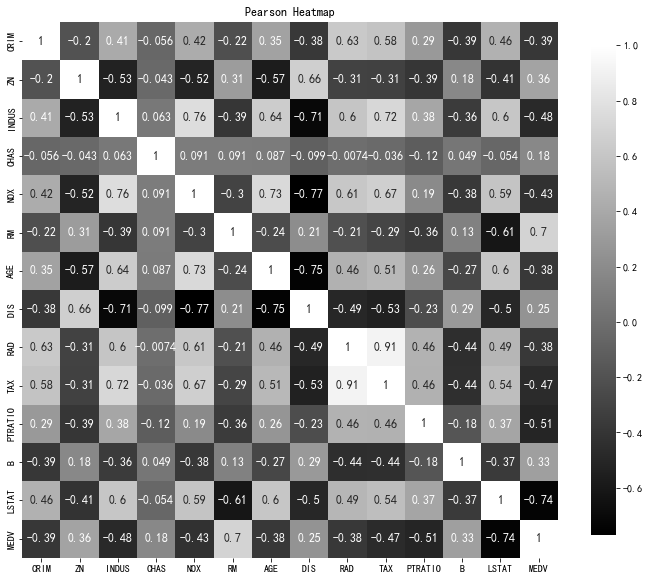

In [8]:
# Pearson Heatmap
_, ax = plt.subplots(figsize=(12, 10)) #分辨率1200×1000
ax.set_title("Pearson Heatmap")
corr = data.corr(method='pearson') # 使用皮尔逊系数计算列与列的相关性
sns.heatmap(corr, square=True, cmap="gray", cbar_kws={'shrink': .9},
            ax=ax, annot=True, annot_kws={'fontsize': 12})
# plt.savefig('Pearson Heatmap.png')
plt.show()

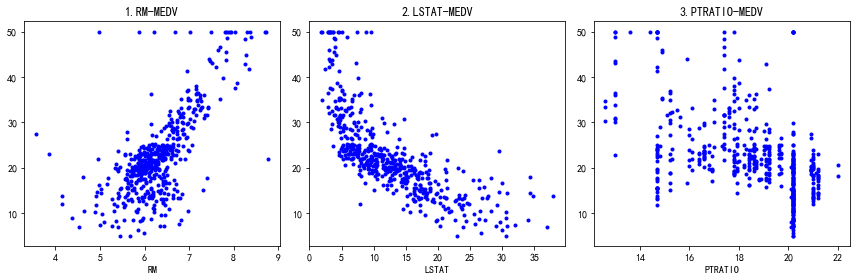

In [9]:
# 3个主要属性的散点图
titles = ['RM','LSTAT','PTRATIO']
plt.figure(figsize = (12, 4))
for i in range(len(titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[titles[i]], data['MEDV'], marker=".", color='b')
    plt.xlabel(titles[i])
    plt.title(str(i+1) + '.' + titles[i] + '-MEDV')
plt.tight_layout()
# plt.savefig('3个主要属性的散点图.png')
plt.show()

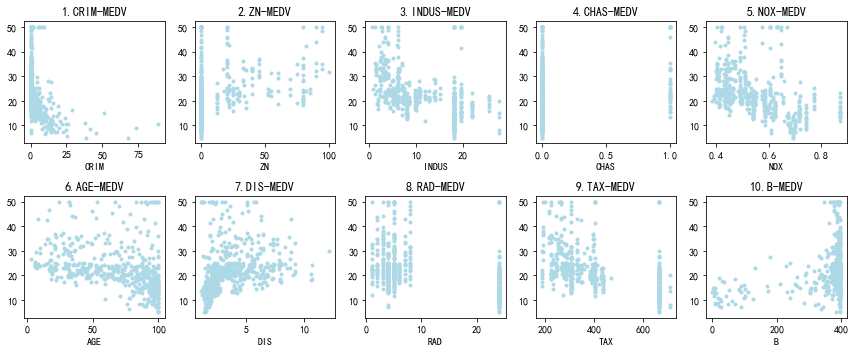

In [10]:
# 10个次要属性的散点图
titles = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B']
plt.figure(figsize = (12, 5))
for i in range(len(titles)):
    plt.subplot(2, 5, i+1)
    plt.scatter(data[titles[i]], data['MEDV'], marker=".", color='lightblue')
    plt.xlabel(titles[i])
    plt.title(str(i+1) + '.' + titles[i] + '-MEDV')
plt.tight_layout()
# plt.savefig('10个次要属性的散点图.png')
plt.show()

### CRIM和ZN两个变量的偏度很大，需要降低偏度，转化为峰度分布

In [11]:
data['CRIM'].skew(), data['ZN'].skew()

(5.223148798243851, 2.2256663227354307)

In [12]:
# 取对数
data['CRIM'] = np.log(data['CRIM'])
data['ZN'] += 1e-5
data['ZN'] = np.log(data['ZN'])
data['CRIM'].skew(), data['ZN'].skew()

(0.4059344988496048, 1.077003628405728)

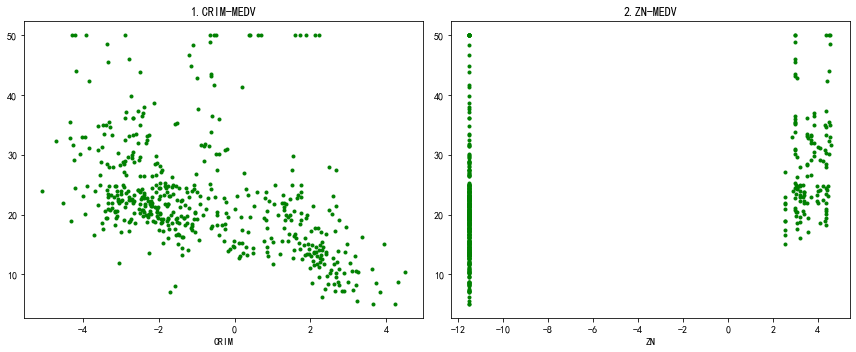

In [13]:
titles = ['CRIM','ZN']
plt.figure(figsize = (12, 5))
for i in range(len(titles)):
    plt.subplot(1, 2, i+1)
    plt.scatter(data[titles[i]], data['MEDV'], marker=".", color='g')
    plt.xlabel(titles[i])
    plt.title(str(i+1) + '.' + titles[i] + '-MEDV')
plt.tight_layout()
# plt.savefig('CRIM和ZN属性降低偏度后的散点图.png')
plt.show()

In [14]:
# 储存数据
data.to_csv('data_1.csv')